# Simulation example

This notebook ilusrates the example from 7.1 where a closed-form solution for the Shapley is compared with their algorithm.
Here we plot only the Figure 3.
Here we use only the linear regression estimator.

In [10]:
#### CLOSED-FORM SOLUTION IMPLEMENTATION ####
n_nodes = 7
n_samples = 1000


import numpy as np
from scipy.stats import bernoulli
import matplotlib.pyplot as plt
import logging

logger = logging.getLogger(__name__)
logger.setLevel(logging.ERROR)
np.random.seed(5)


def generate_data(n_nodes=5, n_samples=1000, lambda_magnitude=1):
    """
    Generate the data described in section 7.1
    """

    w = [np.random.uniform(-5, 5) for _ in range(n_nodes)]

    # Generate the "old" distribution
    X_old = [np.random.normal(loc=w[i], scale=1, size=n_samples) for i in range(n_nodes - 1)]
    X_old.append(np.array(X_old).sum(axis=0))
    X_old = np.array(X_old).T

    # Generate the "new" distribution by randomly shifting
    # each feature by lambda
    lambdas = lambda_magnitude * bernoulli(p=0.5).rvs(size=n_nodes)
    X_new = [lambdas[i] + np.random.normal(loc=w[i] + 1, scale=1, size=n_samples) for i in range(n_nodes - 1)]
    X_new.append(np.array(X_new).sum(axis=0) + lambdas[-1])
    X_new = np.array(X_new).T

    return X_new, X_old


def closed_form_solution_shapley(X_new, X_old):
    """
    According to section 7:

    - The mean differences on our target variable corresponds to the sum of its proposed shifts, so
    $\delta(\mathbb{E}) = \mathbb{E}_{X_n~\tilde{P}_{X_n}}[X_n] - \mathbb{E}_{X_n~P_{X_n}}[X_n] = \lambda_1 + ... + \lambda_n$

    - This corresponds to the shappley value, so $\phi_w(\mathbb{E})=\lambda_w$
    - Then $\phi_1(\mathbb{E}) + .... + \delta(\mathbb{E})$


    """
    return [np.mean(X_new[:, i]) - np.mean(X_old[:, i]) for i in range(n_nodes)]



Magnitude: 1


Estimating boostrap interval...:   0%|                                                                                                                                                      | 0/10 [00:00<?, ?it/s]/home/tpereira/miniconda3/envs/why/lib/python3.10/site-packages/dowhy/gcm/distribution_change.py:231: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  joint_data = old_data.append(new_data, ignore_index=True, sort=True)

  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]
Estimating Shapley Values. Average change of Shapley values in run 2 (10 evaluated permutations): -0.01495223322058711%:   0%|                                                               | 0/1 [00:00<?, ?it/s]
Estimating Shapley Values. Average change of Shapley value

Magnitude: 2


Estimating boostrap interval...:   0%|                                                                                                                                                      | 0/10 [00:00<?, ?it/s]/home/tpereira/miniconda3/envs/why/lib/python3.10/site-packages/dowhy/gcm/distribution_change.py:231: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  joint_data = old_data.append(new_data, ignore_index=True, sort=True)

  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]
Estimating Shapley Values. Average change of Shapley values in run 2 (10 evaluated permutations): -0.6713634582032414%:   0%|                                                                | 0/1 [00:00<?, ?it/s]
Estimating Shapley Values. Average change of Shapley value

Magnitude: 3


Estimating boostrap interval...:   0%|                                                                                                                                                      | 0/10 [00:00<?, ?it/s]/home/tpereira/miniconda3/envs/why/lib/python3.10/site-packages/dowhy/gcm/distribution_change.py:231: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  joint_data = old_data.append(new_data, ignore_index=True, sort=True)

  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]
Estimating Shapley Values. Average change of Shapley values in run 2 (10 evaluated permutations): 0.5036256692797138%:   0%|                                                                 | 0/1 [00:00<?, ?it/s]
Estimating Shapley Values. Average change of Shapley value

Magnitude: 4


Estimating boostrap interval...:   0%|                                                                                                                                                      | 0/10 [00:00<?, ?it/s]/home/tpereira/miniconda3/envs/why/lib/python3.10/site-packages/dowhy/gcm/distribution_change.py:231: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  joint_data = old_data.append(new_data, ignore_index=True, sort=True)

  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]
Estimating Shapley Values. Average change of Shapley values in run 2 (10 evaluated permutations): -5.588572359151687%:   0%|                                                                 | 0/1 [00:00<?, ?it/s]
Estimating Shapley Values. Average change of Shapley value

Magnitude: 5


Estimating boostrap interval...:   0%|                                                                                                                                                      | 0/10 [00:00<?, ?it/s]/home/tpereira/miniconda3/envs/why/lib/python3.10/site-packages/dowhy/gcm/distribution_change.py:231: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  joint_data = old_data.append(new_data, ignore_index=True, sort=True)

  0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]
Estimating Shapley Values. Average change of Shapley values in run 2 (10 evaluated permutations): 3.3009767919838833%:   0%|                                                                 | 0/1 [00:00<?, ?it/s]
Estimating Shapley Values. Average change of Shapley value

estimated_shap: [0.97122657 0.92725003 0.9473909  5.82367934 0.85545014 1.12299467]
closed-form shap:  [1.0821388  0.96822233 0.91299937 6.01447643 0.98889529 0.98679964]


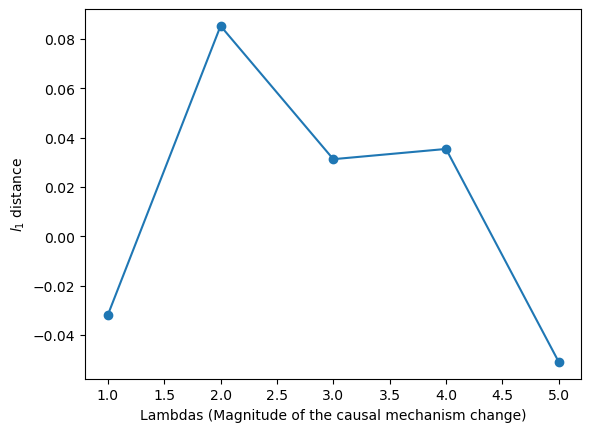

In [11]:
#### BOOTSTRAP SOLUTION ####

import networkx as nx
from dowhy import gcm
from scipy.stats import halfnorm
import pandas as pd


def estimated(X_new, X_old, n_nodes=5):

    # Created CAUSAL Graph
    edges = [(f"X{i+1}", f"X{n_nodes}") for i in range(n_nodes - 1)]
    causal_graph = nx.DiGraph(edges)
    causal_model = gcm.StructuralCausalModel(causal_graph)

    for node in causal_graph.nodes:
        if len(list(causal_graph.predecessors(node))) > 0:
            causal_model.set_causal_mechanism(node, gcm.AdditiveNoiseModel(gcm.ml.create_linear_regressor()))
        else:
            causal_model.set_causal_mechanism(node, gcm.ScipyDistribution(halfnorm))

    # Preparing the dataframes
    outlier_data = pd.DataFrame(X_new, columns=[f"X{i}" for i in range(1, n_nodes + 1)])
    normal_data = pd.DataFrame(X_old, columns=[f"X{i}" for i in range(1, n_nodes + 1)])
    

    # Estimating the shapley
    median_attribs, _ = gcm.confidence_intervals(
        lambda: gcm.distribution_change(
            causal_model,
            normal_data.sample(frac=0.6),
            outlier_data.sample(frac=0.6),
            f"X{n_nodes}",
            difference_estimation_func=lambda x, y: np.mean(y) - np.mean(x),
        ),
        num_bootstrap_resamples=10,
        n_jobs=1,
    )

    return median_attribs


# Plotting figure 1

l1_norms_lambdas = []
lambda_magnitudes = list(range(1, 6))
logger.info("Testing magnitudes")
for lambda_magnitude in lambda_magnitudes:
    # logger.info(f"Magnitude: {lambda_magnitude}")
    print(f"Magnitude: {lambda_magnitude}")
    X_new, X_old = generate_data(n_nodes, n_samples, lambda_magnitude=lambda_magnitude)

    closed_form_shap = np.array(closed_form_solution_shapley(X_new, X_old))

    estimated_shap = estimated(X_new, X_old, n_nodes)
    estimated_shap = np.array(list(estimated_shap.values()))

    l1_norms_lambdas.append(np.mean(estimated_shap[0:-1]) - np.mean(closed_form_shap[0:-1]))


# Plots
f, ax = plt.subplots(1, 1)


ax.plot(lambda_magnitudes, l1_norms_lambdas)
ax.scatter(lambda_magnitudes, l1_norms_lambdas)
ax.set_xlabel("Lambdas (Magnitude of the causal mechanism change)")
ax.set_ylabel("$l_1$ distance")

#plt.show()

print(f"estimated_shap: {estimated_shap[0:-1]}")
print(f"closed-form shap:  {closed_form_shap[0:-1]}")

